# Block 1

In [ ]:
# imported the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Block 2

In [ ]:
# loaded in the data - index_col=0 ensures that there are no extra index columns (the 1st column becomes the index)
data_df = pd.read_excel('messed_up_iris.xlsx', index_col=0)

print('------------ 2a ------------')
print(data_df.shape) # shows the shape of the data
print('------------ 2b ------------')
print(data_df.head()) # shows the head of the data

------------ 2a ------------
(150, 7)
------------ 2b ------------
   sepal_length  sepal_width  petal_length  petal_width species   color  origin
0           5.1          3.5           1.4          0.2  setosa   green     usa
1           4.9          3.0           1.4          0.2  setosa  yellow     usa
2           4.7          3.2           1.3          0.2  setosa   green     usa
3           4.6          3.1           1.5          0.2  setosa  orange   japan
4           5.0          3.6           1.4          0.2  setosa    blue  europe


# Block 3

In [ ]:
# removed the column(s) where more than 50% of the data is missing
# drop the column if the number of NaNs in the column is greater than the total number of rows in the dataframe/2 (we want to only keep columns that have len(data_df.index)/2+ non-NaNs)
data_df = data_df.dropna(thresh = len(data_df.index)/2, axis=1)

# removed the rows where more than 50% of the data is missing - used dropna(thresh = x), which only keeps rows w/ at least X number of non-NaNs 
# since we want to remove rows that have more than 50% of the data missing, x=4 bc we only want to keep rows that have 4+ non-NaNs
data_df = data_df.dropna(thresh = len(data_df.columns)/2) 

print(data_df.shape) # shows the shape of the data

(145, 6)


# Block 4

In [ ]:
# used the drop_duplicates method to remove rows w/ duplicate data - ignore_index=True re-indexes the data
data_df = data_df.drop_duplicates(ignore_index=True)

print(data_df.shape) # shows the shape of the data
print(any(data_df.duplicated())) # double checking to make sure that there are no duplicates in the dataframe

(140, 6)
False


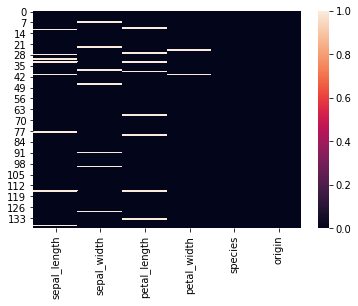

In [ ]:
sns.heatmap(data_df.isnull()) # visualized the NaNs that exist in the data_df dataframe

# Block 5

In [ ]:
# fixed misspelled species names
data_df['species'] = np.where(data_df['species'] == 'seotsa', 'setosa', data_df['species'])
data_df['species'] = np.where(data_df['species'] == 'versicolr', 'versicolor', data_df['species'])
data_df['species'] = np.where(data_df['species'] == 'virginia', 'virginica', data_df['species'])
data_df['species'] = np.where(data_df['species'] == 'west virginia', 'virginica', data_df['species'])

# fixed misspelled origin names
data_df['origin'] = np.where(data_df['origin'] == 'euarope', 'europe', data_df['origin'])
data_df['origin'] = np.where(data_df['origin'] == 'uas', 'usa', data_df['origin'])

# dummy coding the categorical data (species and origin) from the data_df dataframe
species_dummy_df = pd.get_dummies(data_df['species'])
origin_dummy_df = pd.get_dummies(data_df['origin'])

# concat the data_df dataframe with the dummy codes for each category
data_dummy_df = pd.concat([data_df, species_dummy_df, origin_dummy_df], axis=1)

print(data_dummy_df.head()) # shows the head of the dummy coded data

   sepal_length  sepal_width  petal_length  ...  europe japan usa
0           5.1          3.5           1.4  ...       0     0   1
1           4.9          3.0           1.4  ...       0     0   1
2           4.7          3.2           1.3  ...       0     0   1
3           4.6          3.1           1.5  ...       0     1   0
4           5.0          3.6           1.4  ...       1     0   0

[5 rows x 12 columns]


# Block 6

In [ ]:
# dropped the redundant columns (species, origin, setosa, and europe) from the dataframe so that we only have the dummy coded columns 
data_dummy_updated_df = data_dummy_df.drop(columns=['species', 'origin', 'setosa', 'europe'])

# shows the head of the updated dataframe
print(data_dummy_updated_df.head())

   sepal_length  sepal_width  petal_length  ...  virginica  japan  usa
0           5.1          3.5           1.4  ...          0      0    1
1           4.9          3.0           1.4  ...          0      0    1
2           4.7          3.2           1.3  ...          0      0    1
3           4.6          3.1           1.5  ...          0      1    0
4           5.0          3.6           1.4  ...          0      0    0

[5 rows x 8 columns]


# Block 7

In [ ]:
# used a for loop to remove outliers above 2 std devs from the dataframe
for i in data_dummy_updated_df.columns:

  # if the 1st value of the column is a float:
  if isinstance(data_dummy_updated_df[i][0], float) == 1:
    
    # find the upper threshold, which in this case, is 2 std dev above the mean (values greater than the upper threshold are outliers)
    upper_threshold = data_dummy_updated_df[i].mean() + (2*data_dummy_updated_df[i].std())

    # get the indexes of the rows that contain outliers and drop them
    data_dummy_updated_df.drop(data_dummy_updated_df.loc[data_dummy_updated_df[i] > upper_threshold].index, inplace=True)

# resets the index after the rows w/ outliers have been dropped
data_dummy_updated_df = data_dummy_updated_df.reset_index(drop=True)

# Block 8

In [ ]:
# EXTRA CREDIT
# replace the remaining NaNs w/ the median of the appropriate column w/ respect to species
for j in data_dummy_updated_df.columns:  
  
  # if the 1st value of the column is a float:
  if isinstance(data_dummy_updated_df[j][0], float) == 1:
    
    # species: setosa
    # locate the rows where the species is setosa (0 in both species versicolor and virginia column)
    setosa_df = data_dummy_updated_df.loc[np.where((data_dummy_updated_df['versicolor'] == 0) & (data_dummy_updated_df['virginica'] == 0))]
    # where there's a NaN in a column and the species is setosa, fill it w/ the median of that column
    data_dummy_updated_df[j] = np.where((data_dummy_updated_df[j].isnull()) & (data_dummy_updated_df['versicolor'] == 0) & (data_dummy_updated_df['virginica'] == 0), setosa_df[j].median(), data_dummy_updated_df[j])

    # species: versicolor
    # locate the rows where the species is versicolor
    versicolor_df = data_dummy_updated_df.loc[np.where(data_dummy_updated_df['versicolor'] == 1)]
    # where there's a NaN in a column and the species is versicolor, fill it w/ the median of that column
    data_dummy_updated_df[j] = np.where((data_dummy_updated_df[j].isnull()) & (data_dummy_updated_df['versicolor'] == 1), versicolor_df[j].median(), data_dummy_updated_df[j])

    # species: virginica
    # locate the rows where the species is virginica
    virginica_df = data_dummy_updated_df.loc[np.where(data_dummy_updated_df['virginica'] == 1)]
    # where there's a NaN in a column and the species is virginica, fill it w/ the median of that column
    data_dummy_updated_df[j] = np.where((data_dummy_updated_df[j].isnull()) & (data_dummy_updated_df['virginica'] == 1), virginica_df[j].median(), data_dummy_updated_df[j])

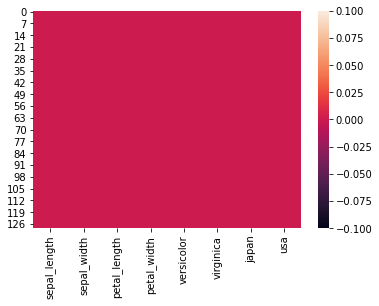

In [ ]:
sns.heatmap(data_dummy_updated_df.isnull()) # visualized how many NaNs there are in the data_dummy_updated_df dataframe

# Block 9 

In [ ]:
# EXTRA CREDIT
# bin the petal width column into low, medium, and high depending on the following bins (bins = 0 to 0.9, 0.9 to 1.8, 1.8 to 2.7)
petal_width_bins = pd.cut(data_dummy_updated_df['petal_width'], [0, 0.9, 1.8, 2.7], labels=[1, 2, 3])

# created a new column in the data_dummy_updated_df dataframe for the binned petal widths
data_dummy_updated_df['petal_width_bins'] = petal_width_bins

print(data_dummy_updated_df.head()) # shows the head of data_dummy_updated_df dataframe w/ the petal_width_bins as a new column 

   sepal_length  sepal_width  petal_length  ...  japan  usa  petal_width_bins
0           5.1          3.5           1.4  ...      0    1                 1
1           4.9          3.0           1.4  ...      0    1                 1
2           4.7          3.2           1.3  ...      0    1                 1
3           4.6          3.1           1.5  ...      1    0                 1
4           5.0          3.6           1.4  ...      0    0                 1

[5 rows x 9 columns]


# Block 10

In [ ]:
print('------------ 10a ------------')
print(data_dummy_updated_df.info()) # shows that there are no missing data using the info method

print('------------ 10b ------------')
print(data_dummy_updated_df.describe()) # shows descriptives of the final dataset using the describe method

------------ 10a ------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sepal_length      129 non-null    float64 
 1   sepal_width       129 non-null    float64 
 2   petal_length      129 non-null    float64 
 3   petal_width       129 non-null    float64 
 4   versicolor        129 non-null    uint8   
 5   virginica         129 non-null    uint8   
 6   japan             129 non-null    uint8   
 7   usa               129 non-null    uint8   
 8   petal_width_bins  129 non-null    category
dtypes: category(1), float64(4), uint8(4)
memory usage: 4.9 KB
None
------------ 10b ------------
       sepal_length  sepal_width  ...       japan         usa
count    129.000000    129.00000  ...  129.000000  129.000000
mean       5.837597      3.05969  ...    0.302326    0.379845
std        0.799708      0.44221  ...    0.461056    0